In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
# 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Loss Function

### Mean Squared Error

$
E = \frac{1}{2} \sum_k (y_k - t_k)^2
$

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

### Cross Entropy Error

$
E = -\sum_k t_k \log y_k
$

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return - np.sum(t * np.log(y + delta))

# Numerical Differentiation

### Example
$
f(x) = 0.01 x ^ 2 + 0.1 x \\
\frac{df(x)}{dx} = 0.02x + 0.1 \Rightarrow 
\begin{cases}
f(5) = 0.2 \\ 
f(10) = 0.3 \\
\end{cases} 
$

### Version1

In [4]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

0.0
0.0


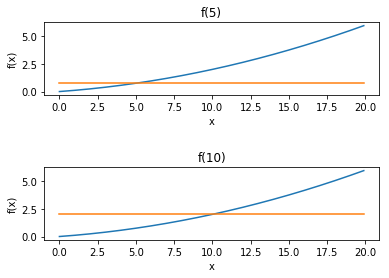

In [5]:
def function_1(x):
    return (0.01 * x ** 2) + (0.1 * x) 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - (d * x)
    return lambda t: (d * t) + y

x = np.arange(0.0, 20.0, 0.1)
y0 = function_1(x)

tl = tangent_line(function_1, 5)
t2 = tangent_line(function_1, 10)
y1 = tl(x)
y2 = t2(x)

plt.subplot(2, 1, 1)
plt.plot(x, y0)
plt.plot(x, y1)
plt.title('f(5)')
plt.xlabel("x")
plt.ylabel("f(x)")

plt.subplot(2, 1, 2)
plt.plot(x, y0)
plt.plot(x, y2)
plt.title('f(10)')
plt.xlabel("x")
plt.ylabel("f(x)")

plt.subplots_adjust(hspace = 1)
plt.show()

### Version2

In [6]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

0.1999999999990898
0.2999999999986347


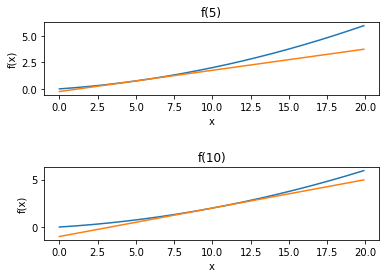

In [7]:
def function_1(x):
    return (0.01 * x ** 2) + (0.1 * x) 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - (d * x)
    return lambda t: (d * t) + y

x = np.arange(0.0, 20.0, 0.1)
y0 = function_1(x)

tl = tangent_line(function_1, 5)
t2 = tangent_line(function_1, 10)
y1 = tl(x)
y2 = t2(x)

plt.subplot(2, 1, 1)
plt.plot(x, y0)
plt.plot(x, y1)
plt.title('f(5)')
plt.xlabel("x")
plt.ylabel("f(x)")

plt.subplot(2, 1, 2)
plt.plot(x, y0)
plt.plot(x, y2)
plt.title('f(10)')
plt.xlabel("x")
plt.ylabel("f(x)")

plt.subplots_adjust(hspace = 1)
plt.show()

# Partial Differentiation

$
f(x_0, x_1) = x_0 ^ 2 + x_1 ^ 2 \\
$

In [8]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

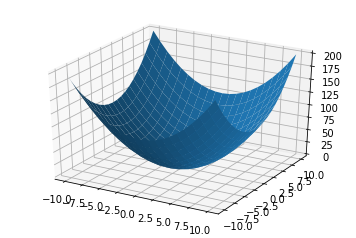

In [9]:
def function_2(x0, x1):
    return (x0 ** 2) + (x1 ** 2)

x0 = np.arange(-10, 11, 1)
x1 = np.arange(-10, 11, 1)
X0, X1 = np.meshgrid(x0, x1)
Y = function_2(X0, X1)

fig = plt.figure()
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(X0, X1, Y)
plt.show()

$
\frac{\partial f(x_0, x_1)}{\partial x_0} = 2x_0 \Rightarrow \frac{\partial f(3, 4)}{\partial x_0} = 6 \\
\frac{\partial f(x_0, x_1)}{\partial x_0} = 2x_1 \Rightarrow \frac{\partial f(3, 4)}{\partial x_1} = 8 \\
$

In [10]:
def function_tmp1(x0):
    return (x0 ** 2) + (4 ** 2)

def function_tmp2(x1):
    return (3 ** 2) + (x1 ** 2)

print(numerical_diff(function_tmp1, 3))
print(numerical_diff(function_tmp2, 4))    

6.00000000000378
7.999999999999119


# Gradient

In [11]:
def function_2(x):
    return np.sum(x ** 2)
    
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i in range(x.size):
        tmp_val = x[i]
        # f(x + h)
        x[i] = tmp_val + h
        fxh1 = f(x)
        # f(x - h)
        x[i] = tmp_val - h
        fxh2 = f(x)
        # diff
        grad[i] = (fxh1 - fxh2) / (2 * h)
        x[i] = tmp_val
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0, 4.0])))
print(numerical_gradient(function_2, np.array([3.0, 0])))

[6. 8.]
[0. 8.]
[6. 0.]


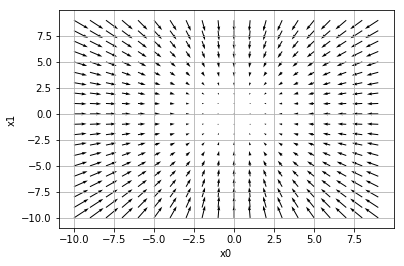

In [12]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x ** 2)
    else:
        return np.sum(x ** 2, axis = 1)

x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy")
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
    
plt.show()

### Gradient Method
$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0} \\
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1} \\
$

In [13]:
def gradient_descent(f, init_x, lr, step_num):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

def function_2(x):
    return (x[0] ** 2) + (x[1] ** 2)

print(gradient_descent(function_2, np.array([-3.0, 4.0]), lr = 1, step_num = 100)) 
print(gradient_descent(function_2, np.array([-3.0, 4.0]), lr = 1e-5, step_num = 100))
print(gradient_descent(function_2, np.array([-3.0, 4.0]), lr = 100, step_num = 100)) 

[-3.  4.]
[-2.99400594  3.99200791]
[-2.67498081e+14 -1.25119902e+12]


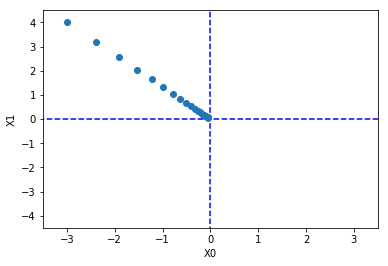

In [14]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append( x.copy() )
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr = lr, step_num = step_num)
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### Neural Network with Gradient Method
$
W = 
\begin{pmatrix}
W_{11} & W_{21} \\
W_{12} & W_{22} \\
\end{pmatrix}
\Rightarrow
\frac{\partial L}{\partial W}
=
\begin{pmatrix}
\frac{\partial L}{\partial W_{11}} & \frac{\partial L}{\partial W_{12}} \\
\frac{\partial L}{\partial W_{21}} & \frac{\partial L}{\partial W_{22}} \\
\end{pmatrix}
$

In [15]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.07905002  0.37870563 -0.45775564]
 [ 0.11857502  0.56805844 -0.68663346]]


# Appendix

In [17]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
        
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        batch_num = x.shape[0]
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads